In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import os
import sys
import fileinput
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import rdmolops
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Descriptors import HeavyAtomMolWt
from rdkit.Chem.Lipinski import *
from rdkit.Chem.Descriptors  import *
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.GraphDescriptors import *

In [2]:
os.chdir("/Users/hassan/Desktop/temp/sulfides/logs/")
filename = '1-test.log'

NAtoms = 0
IR_present = False
Raman_present = False
Frequencies = []
IR_intensities = []
Raman_intensities = []

with open (filename) as inp:
    for lines in inp:
        if "NAtoms" in lines:
            words = lines.split()
            NAtoms = int(words[1])
        if "Frequencies" in lines:
            words = lines.split()
            for i in range(2,len(words)):
                Frequencies.append(float(words[i]))
        if "IR Inten" in lines:
            IR_present = True
            words = lines.split()
            for i in range(3,len(words)):
                IR_intensities.append(float(words[i]))
        if "Raman Activ" in lines:
            Raman_present = True
            words = lines.split()
            for i in range(3,len(words)):
                Raman_intensities.append(float(words[i]))

nFreq = 3*NAtoms - 6
if IR_present == False:
    print ("NO IR data found!!")
if Raman_present == False:
    print ("NO Raman data found!!")

if Frequencies[0] <0:
    print ("Warning: One or more imaginary frequencies detected!")
    
x  = Frequencies
y1 = IR_intensities
y2 = Raman_intensities

if IR_present == True:
    markerline, stemlines, baseline = plt.stem(
    x, y1, linefmt='hotpink',basefmt = 'limegreen', markerfmt=' ', bottom=1.1)
    markerline.set_markerfacecolor('none')
    plt.setp(stemlines, 'linewidth', 0.85)
    plt.title("IR Spectrum")
    plt.xlabel("Frequencies (cm-1)")
    plt.ylabel("Intensity")
    plt.show()

if Raman_present == True:
    markerline, stemlines, baseline = plt.stem(
    x, y2, linefmt='teal',basefmt = 'limegreen', markerfmt=' ', bottom=1.1)
    markerline.set_markerfacecolor('none')
    plt.setp(stemlines, 'linewidth', 0.85)
    plt.title("Raman Spectrum")
    plt.xlabel("Frequencies (cm-1)")
    plt.ylabel("Intensity")
    plt.show()
    
print ("Number of atoms = ", NAtoms)
print ("Frequencies = ", len(IR_intensities))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hassan/Desktop/temp/sulfides/logs/'

In [3]:
print(Frequencies)
freq1= []
freq2= []
for i in range(len(Frequencies)):
    if (i<(len(Frequencies)/2)):
        freq1.append(Frequencies[i])
    else:
        freq2.append(Frequencies[i])
print (len(freq1), len(freq2))


[45.0894, 52.7614, 88.4433, 91.923, 155.3358, 303.7945, 314.0569, 443.3576, 502.8839, 529.2912, 563.7682, 611.0433, 611.1314, 935.9118, 976.5466, 1023.545, 1031.9852, 1106.4624, 1140.3929, 1382.8135, 1383.5372, 1443.5307, 1444.0788, 1457.3739, 1458.1476, 1783.1759, 1847.1306, 3061.2593, 3061.4435, 3147.0805, 3147.1283, 3180.4427, 3180.4992, 105.9335, 110.1005, 116.693, 173.2608, 224.1228, 345.1633, 355.3799, 484.8675, 533.3715, 548.7831, 550.8398, 574.5806, 664.2982, 935.7126, 998.2839, 1031.1095, 1031.2674, 1064.9765, 1161.09, 1371.79, 1372.7136, 1445.0308, 1445.7306, 1450.5134, 1452.1801, 1639.4973, 1656.0496, 3076.9483, 3077.1268, 3168.9336, 3169.0543, 3213.0636, 3213.1735]
33 33


In [4]:
percent_difference = []
for i in range(len(freq1)):
    percent_difference.append(np.absolute(np.around((freq2[i]-freq1[i])/freq1[i],2)))
    #print(i,"       ",np.absolute(np.around((freq2[i]-freq1[i])/freq1[i],2)))

In [5]:
for i in range(len(freq1)):
    if (freq1[i] >= 400 and freq1[i] <= 1500):
        print (freq1[i], freq2[i], np.around(np.absolute(freq1[i] - freq2[i]),3))

443.3576 484.8675 41.51
502.8839 533.3715 30.488
529.2912 548.7831 19.492
563.7682 550.8398 12.928
611.0433 574.5806 36.463
611.1314 664.2982 53.167
935.9118 935.7126 0.199
976.5466 998.2839 21.737
1023.545 1031.1095 7.565
1031.9852 1031.2674 0.718
1106.4624 1064.9765 41.486
1140.3929 1161.09 20.697
1382.8135 1371.79 11.024
1383.5372 1372.7136 10.824
1443.5307 1445.0308 1.5
1444.0788 1445.7306 1.652
1457.3739 1450.5134 6.861
1458.1476 1452.1801 5.967


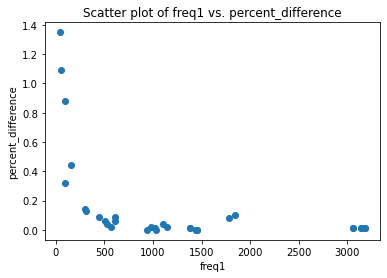

In [6]:
# x = freq1
# y = percent_differencabce
# Create scatter plot
plt.scatter(freq1, percent_difference)

# Set axis labels and title
plt.xlabel('freq1')
plt.ylabel('percent_difference')
plt.title('Scatter plot of freq1 vs. percent_difference')

# Display plot
plt.show()

In [7]:
os.chdir("/Users/hassan/Desktop/temp/freqs_6")

In [8]:
file1="freq-6-anion1.log"
file2="freq-6-anion2.log"

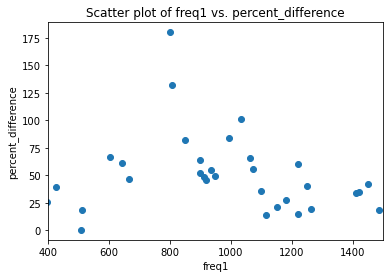

In [9]:
file1="freq-6-cation1.log"
file2="freq-6-anion1.log"

Frequencies = []
filename=file1

with open (filename) as inp:
    for lines in inp:
        if "Frequencies" in lines:
            words = lines.split()
            for i in range(2,len(words)):
                Frequencies.append(float(words[i]))
filename=file2
Frequencies_2 =[]
with open (filename) as inp:
    for lines in inp:
        if "Frequencies" in lines:
            words = lines.split()
            for i in range(2,len(words)):
                Frequencies_2.append(float(words[i]))
                
                
percent_difference = []
for i in range(len(Frequencies)):
    percent_difference.append(np.absolute(np.around((Frequencies[i]-Frequencies_2[i]),2)))

plt.scatter(Frequencies, percent_difference)

plt.xlabel('freq1')
plt.ylabel('percent_difference')
plt.title('Scatter plot of freq1 vs. percent_difference')
plt.xlim(400, 1500)

plt.show()

NO Raman data found!!


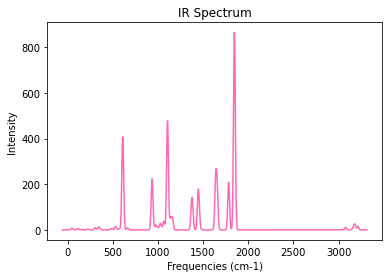

Number of atoms =  13
Frequencies =  66


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir("/Users/hassan/Desktop/temp/sulfides/logs/")
filename = '1-test.log'

NAtoms = 0
IR_present = False
Raman_present = False
Frequencies = []
IR_intensities = []
Raman_intensities = []

with open(filename) as inp:
    for lines in inp:
        if "NAtoms" in lines:
            words = lines.split()
            NAtoms = int(words[1])
        if "Frequencies" in lines:
            words = lines.split()
            for i in range(2, len(words)):
                Frequencies.append(float(words[i]))
        if "IR Inten" in lines:
            IR_present = True
            words = lines.split()
            for i in range(3, len(words)):
                IR_intensities.append(float(words[i]))
        if "Raman Activ" in lines:
            Raman_present = True
            words = lines.split()
            for i in range(3, len(words)):
                Raman_intensities.append(float(words[i]))

nFreq = 3 * NAtoms - 6
if IR_present == False:
    print("NO IR data found!!")
if Raman_present == False:
    print("NO Raman data found!!")

if Frequencies[0] < 0:
    print("Warning: One or more imaginary frequencies detected!")

x = Frequencies
y1 = IR_intensities
y2 = Raman_intensities

# Define the Gaussian function
def gaussian(x, mu, sigma, intensity):
    return intensity * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Define the broadening function
def broadening(frequencies, intensities, sigma, num_points=1000):
    x_vals = np.linspace(min(frequencies) - 10 * sigma, max(frequencies) + 10 * sigma, num_points)
    y_vals = np.zeros(num_points)

    for freq, intensity in zip(frequencies, intensities):
        y_vals += gaussian(x_vals, freq, sigma, intensity)

    return x_vals, y_vals

sigma = 10  # Adjust this value to change the width of Gaussian peaks

if IR_present:
    x_ir, y_ir = broadening(x, y1, sigma)
    plt.plot(x_ir, y_ir, color='hotpink')
    plt.title("IR Spectrum")
    plt.xlabel("Frequencies (cm-1)")
    plt.ylabel("Intensity")
    plt.show()

if Raman_present:
    x_raman, y_raman = broadening(x, y2, sigma)
    plt.plot(x_raman, y_raman, color='teal')
    plt.title("Raman Spectrum")
    plt.xlabel("Frequencies (cm-1)")
    plt.ylabel("Intensity")
    plt.show()

print("Number of atoms = ", NAtoms)
print("Frequencies = ", len(IR_intensities))


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir("/Users/hassan/Desktop/temp/sulfides/logs/")
filename = '1-test.log'

NAtoms = 0
IR_present = False
Raman_present = False
Frequencies = []
IR_intensities = []
Raman_intensities = []

with open(filename) as inp:
    for lines in inp:
        if "NAtoms" in lines:
            words = lines.split()
            NAtoms = int(words[1])
        if "Frequencies" in lines:
            words = lines.split()
            for i in range(2, len(words)):
                Frequencies.append(float(words[i]))
        if "IR Inten" in lines:
            IR_present = True
            words = lines.split()
            for i in range(3, len(words)):
                IR_intensities.append(float(words[i]))
        if "Raman Activ" in lines:
            Raman_present = True
            words = lines.split()
            for i in range(3, len(words)):
                Raman_intensities.append(float(words[i]))

nFreq = 3 * NAtoms - 6
if IR_present == False:
    print("NO IR data found!!")
if Raman_present == False:
    print("NO Raman data found!!")

if Frequencies[0] < 0:
    print("Warning: One or more imaginary frequencies detected!")

x = Frequencies
y1 = IR_intensities
y2 = Raman_intensities



# Define the broadening function
def broadening(frequencies, intensities, sigma, num_points=1000):
    x_vals = np.linspace(min(frequencies) - 10 * sigma, max(frequencies) + 10 * sigma, num_points)
    y_vals = np.zeros(num_points)

    for freq, intensity in zip(frequencies, intensities):
        y_vals += gaussian(x_vals, freq, sigma, intensity)

    return x_vals, y_vals

def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

sigma = 10
x_plot = np.linspace(min(Frequencies)-100, max(Frequencies)+100, 1000)

if IR_present == True:
    y1_plot = sum(gaussian(x_plot, mu, sigma) * intensity for mu, intensity in zip(Frequencies, IR_intensities))
    plt.plot(x_plot, y1_plot, color='hotpink')
    plt.title("IR Spectrum")
    plt.xlabel("Frequencies (cm-1)")
    plt.ylabel("Intensity")
    plt.gca().invert_yaxis()  # Add this line to invert the y-axis
    plt.show()

if Raman_present == True:
    y2_plot = sum(gaussian(x_plot, mu, sigma) * intensity for mu, intensity in zip(Frequencies, Raman_intensities))
    plt.plot(x_plot, y2_plot, color='teal')
    plt.title("Raman Spectrum")
    plt.xlabel("Frequencies (cm-1)")
    plt.ylabel("Intensity")
    plt.gca().invert_yaxis()  # Add this line to invert the y-axis
    plt.show()

print("Number of atoms = ", NAtoms)
print("Frequencies = ", len(IR_intensities))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hassan/Desktop/temp/sulfides/logs/'